<a href="https://colab.research.google.com/github/ammad3059/deep_learning_projects/blob/main/superstore_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# upload file from disk to Colab
from google.colab import files
uploaded = files.upload()

Saving superstore_sales.xlsx to superstore_sales.xlsx


In [3]:
# loading file into pandas dataframe
df = pd.read_excel('superstore_sales.xlsx')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [5]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


Q1. What is the overall sales trend? 

In [6]:
# getting the minimum order date
min_date = df['order_date'].min()
min_date

Timestamp('2011-01-01 00:00:00')

In [7]:
# getting the maximum order date
max_date = df['order_date'].max()
max_date

Timestamp('2014-12-31 00:00:00')

In [8]:
# grouping the sales per year 
anual_sales = df.groupby('year').sum()['sales'].reset_index()
anual_sales

,year,sales
0,2011,2.259451e+06
1,2012,2.677439e+06
2,2013,3.405746e+06
3,2014,4.299866e+06


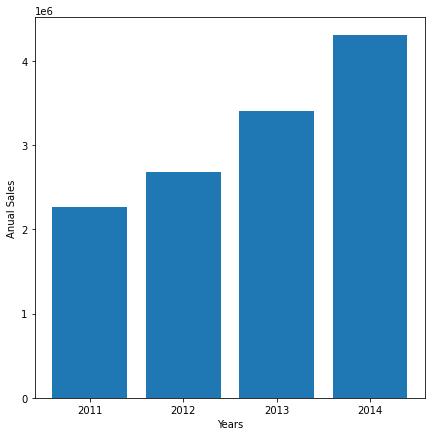

In [9]:
# visualizing the result using matplotlib
plt.figure(figsize=[7,7])
plt.xlabel('Years')
plt.ylabel('Anual Sales')
plt.xticks(anual_sales['year'].values)
plt.bar(anual_sales['year'],anual_sales['sales'])
plt.show()

In [10]:
# getting the sales in the basis of each month in a year 
df['Month-Year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))
df['Month-Year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: Month-Year, Length: 51290, dtype: object

In [11]:
month_year_sales = df.groupby('Month-Year').sum()['sales'].reset_index()
month_year_sales

,Month-Year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


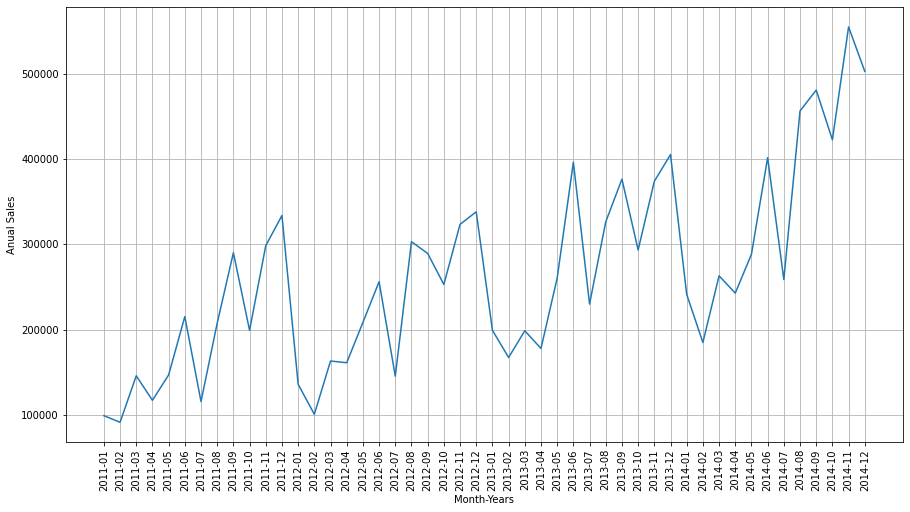

In [12]:
plt.figure(figsize=[15,8])
plt.plot(month_year_sales['Month-Year'],month_year_sales['sales'])
plt.xlabel('Month-Years')
plt.ylabel('Anual Sales')
plt.grid()
plt.xticks(month_year_sales['Month-Year'],rotation='vertical',size=10)
plt.show()

Q2. Which are the Top 10 products by sales?

In [13]:
product_sales = df.groupby('product_name').sum()['sales'].reset_index()
product_sales

,product_name,sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660
3784,iOttie HLCRIO102 Car Mount,215.892
3785,iOttie XL Car Mount,223.888
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554


In [14]:
top_product_sales = product_sales.sort_values(by='sales', ascending=False)
top_product_sales[:10]

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


Q3. Which are the Most Selling Products?

In [15]:
most_sold = pd.DataFrame(df.groupby('product_name').sum()['quantity'])
most_sold

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",24
iOttie HLCRIO102 Car Mount,12
iOttie XL Car Mount,14


In [16]:
# top 10 most sold products
most_sold = most_sold.sort_values(by='quantity', ascending=False)
most_sold[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


Q4. Which is the most preferred Ship Mode?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


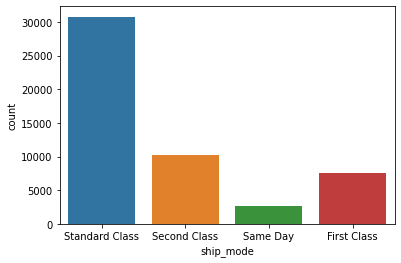

In [17]:
# visualizing the result using seaborn library
sb.countplot(df['ship_mode'])

In [18]:
# above result using matpotlib
shipping = df.groupby('ship_mode').count()['order_id'].reset_index()
shipping

,ship_mode,order_id
0,First Class,7505
1,Same Day,2701
2,Second Class,10309
3,Standard Class,30775


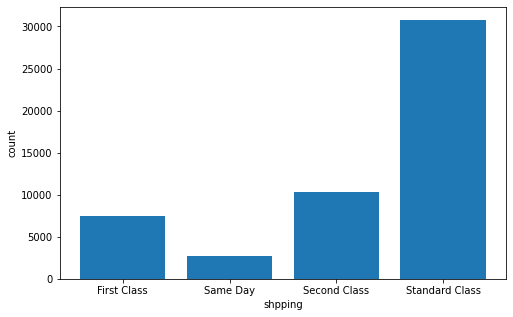

In [19]:
plt.figure(figsize=[8,5])
plt.bar(shipping['ship_mode'],shipping['order_id'])
plt.xlabel('shpping')
plt.ylabel('count')
plt.xticks(shipping['ship_mode'].values)
plt.show()

Q5. Which are the Most Profitable Category and Sub-Category?

In [20]:
cat_sub_cat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])
cat_sub_cat

profit
category        sub_category              
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870
Office Supplies Appliances    141680.58940
                Art            57953.91090
                Binders        72449.84600
                Envelopes      29601.11630
                Fasteners      11525.42410
                Labels         15010.51200
                Paper          59207.68270
                Storage       108461.48980
                Supplies       22583.26310
Technology      Accessories   129626.30620
                Copiers       258567.54818
                Machines       58867.87300
                Phones        216717.00580

In [21]:
# sorted by top to bottom profit irrespective of category
cat_sub_cat.sort_values(by='profit', ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
Office Supplies Appliances    141680.58940
Technology      Accessories   129626.30620
Office Supplies Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
Technology      Machines       58867.87300
Office Supplies Art            57953.91090
Furniture       Furnishings    46967.42550
Office Supplies Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Tables        -64083.38870

In [22]:
# sorted by top to bottom profit in each category
cat_sub_cat.sort_values(by=['category','profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

Q6. which country generated the highest revenue?

In [23]:
country_sales = df.groupby('country').sum()['sales'].reset_index()
country_sales

,country,sales
0,Afghanistan,21673.32000
1,Albania,3888.12000
2,Algeria,36091.59000
3,Angola,25554.00000
4,Argentina,57511.78328
...,...,...
142,Venezuela,26587.82956
143,Vietnam,65800.19940
144,Yemen,2465.71200
145,Zambia,26035.50000


In [27]:
# top 15 country which has generated highest revenue
top = country_sales.sort_values(by='sales', ascending=False)
top[:15]

,country,sales
139,United States,2.297201e+06
6,Australia,9.252359e+05
44,France,8.589311e+05
26,China,7.005620e+05
47,Germany,6.288400e+05
81,Mexico,6.225906e+05
57,India,5.896501e+05
138,United Kingdom,5.285763e+05
58,Indonesia,4.048875e+05
17,Brazil,3.611064e+05
